In [1]:
from IPython.display import HTML
from osgeo import gdal
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import numpy as np
import colorcet as cc
import cmasher as cmr
from cartopy.io.img_tiles import Stamen, GoogleTiles
import cartopy.crs as ccrs
import cartopy.feature as cf

u_speed_data = gdal.Open('sulawesi_uSpeed_2019.tif')
u_speed_array = u_speed_data.ReadAsArray()

v_speed_data = gdal.Open('sulawesi_vSpeed_2019.tif')
v_speed_array = v_speed_data.ReadAsArray()

stacked_speed = np.stack((u_speed_array,v_speed_array))
speed_mag = np.linalg.norm(stacked_speed, ord=None, axis=0)

In [2]:
## Geotransform stuff read https://gdal.org/tutorials/geotransforms_tut.html

x_idx = np.linspace(1, u_speed_array[0].shape[0], u_speed_array[0].shape[0])
y_idx = np.linspace(1, u_speed_array[0].shape[1], u_speed_array[0].shape[1])
x_pixel, y_pixel = np.meshgrid(x_idx, y_idx)
X_coord = u_speed_data.GetGeoTransform()[0] + x_pixel * (u_speed_data.GetGeoTransform()[1]/2) + y_pixel * (u_speed_data.GetGeoTransform()[2]/2)
Y_coord = u_speed_data.GetGeoTransform()[3] + x_pixel * (u_speed_data.GetGeoTransform()[4]/2) + y_pixel * (u_speed_data.GetGeoTransform()[5]/2)

In [3]:
mountains_bnd = [(119.39757405422705, -1.8), (120.4824739565708, -1.8), (120.5209261050083, -1.8), (120.55663167141455, -1.7188529167749487), (120.5923372378208, -1.5980539526190016), (120.61156331203955, -1.5211781509596678), (120.5868440737583, -1.4415538989491588), (120.5703645815708, -1.3152477110362724), (120.53465901516455, -1.205411024964261), (120.55663167141455, -1.1449989332667223), (120.5319124331333, -1.095569908254913), (120.4440218081333, -0.9939632809299963), (120.4110628237583, -0.9884709388738477), (120.4879671206333, -1.095569908254913), (120.33690510891455, -1.026917139677313), (120.19957600735205, -0.933547027016889), (120.12557302547918, -0.8020356698594148), (120.06789480282293, -0.678449817487342), (120.03218923641668, -0.5933110259040042), (120.02669607235418, -0.5328891421673249), (120.00746999813543, -0.49443853970744495), (120.01296316219793, -0.41204366394161607), (119.97176443172918, -0.3351410076588289), (119.98275075985418, -0.2664774073078978), (119.98549734188543, -0.18408059038288238), (119.96077810360418, -0.14013545485201903), (119.99099050594793, -0.09619023688343015), (120.06789480282293, -0.002806493005072836), (120.10085378719793, 0.09057725832854281), (120.09398757026567, 0.14087386389881026), (120.14205283717938, 0.2), (120.03630935752923, 0.2), (119.94841848773865, 0.2), (119.93056570126043, 0.0933238368225917), (119.90309988094793, 0.035645653131869216), (119.92507253719793, -0.002806493005072836), (119.88112722469793, -0.06323128485857987), (119.85091482235418, -0.1483751748229567), (119.83718191219793, -0.2609843014401939), (119.79049001766668, -0.33788754231767165), (119.78774343563543, -0.5191568107975353), (119.87563406063543, -0.6509858458001351), (119.92781911922918, -0.8322449993244969), (119.95803152157293, -0.9256177905804933), (119.96627126766668, -1.0299726953437454), (119.93331228329168, -1.1480543693981518), (119.97176443172918, -1.2524015733632248), (119.96352468563543, -1.3787110188420721), (119.93880544735418, -1.2880983647140853), (119.88387380672918, -1.2249421715094009), (119.86190115047918, -1.1178478737411226), (119.82344900204168, -0.8899167060168125), (119.76577077938543, -0.7416163503916667), (119.73830495907293, -0.6976745052895147), (119.68062673641668, -0.8102746003621403), (119.57076345516668, -0.8899167060168125), (119.55428396297918, -0.9475875110179702), (119.55977712704168, -1.0766566987046775), (119.58724294735418, -1.3104882798274688), (119.57625661922918, -1.4752344522826684), (119.48081289364325, -1.718212397107161), (119.42519460751043, -1.8060614499617846)]

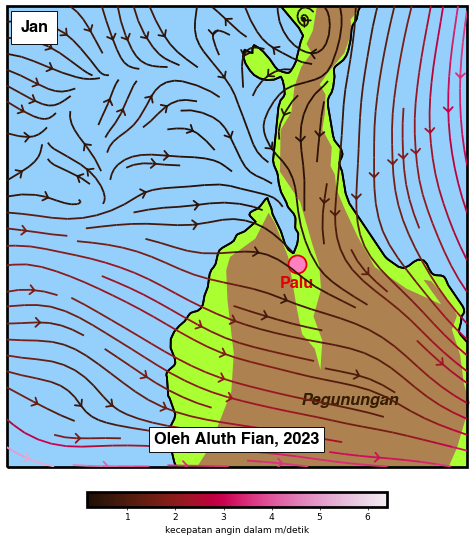

In [4]:
import matplotlib.animation as animation
#tutorial lists
#https://techoverflow.net/2021/04/25/how-to-make-cartopy-coastline-or-border-lines-thicker-line-width/
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.streamplot.html#matplotlib.axes.Axes.streamplot

rect_white = mpatches.Rectangle((X_coord.min(), Y_coord.min()), np.round(np.ptp(X_coord[0]),2), np.round(np.ptp(Y_coord[:,0]),2),
                                ec="none", fc='xkcd:light grey', alpha=0.8)
bulan = ['Jan','Feb','Mar','Apr','Mei','Jun','Juli','Agu','Sep','Okt','Nov','Des']
mountains = mpatches.Polygon(mountains_bnd, fc='xkcd:light brown', zorder=1, alpha=1.0)
#bgmap = GoogleTiles(desired_tile_form='RGB', style='terrain', url='http://mt0.google.com/vt/lyrs=p&hl=en&x={x}&y={y}&z={z}')
#bgmap = Stamen('terrain')
plt.rcParams['axes.linewidth'] =3

fig = plt.figure(figsize=(10,10), dpi=65)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_facecolor('xkcd:light blue')
ax.set_extent([118.6, 120.6, -1.8, 0.2], ccrs.PlateCarree())
#ax.add_image(bgmap, 8)
coastal_line = cf.NaturalEarthFeature('physical', 'coastline', '10m', edgecolor='black', facecolor='xkcd:lime')
coastal_line_edge = cf.NaturalEarthFeature('physical', 'coastline', '10m', edgecolor='black', facecolor='None')
ax.add_feature(coastal_line, lw=2, zorder=0)
ax.add_patch(mountains)
ax.add_feature(coastal_line_edge, lw=2, zorder=2)
ax.plot(119.8635651874369, -0.9183030171555117, 'o', markersize=20, markeredgecolor='xkcd:red',
        markerfacecolor='xkcd:pink', markeredgewidth=2)
ax.text(119.86, -0.97, "Palu", fontfamily='Helvetica', fontweight='bold', fontsize=18, ha='center', va='top', color='xkcd:red')
stream = ax.streamplot(X_coord, np.flipud(Y_coord), np.flipud(u_speed_array[0]), np.flipud(v_speed_array[0]),
                       density=1, color=np.flipud(speed_mag[0]), arrowstyle='->,head_width=0.5,head_length=0.5',
                       cmap=cmr.get_sub_cmap('cmr.flamingo',0.10,0.95), transform=ccrs.PlateCarree(), zorder=3, broken_streamlines=True, linewidth=2)
cbar = fig.colorbar(stream.lines, orientation='horizontal', fraction=.03, pad=0.05, label='kecepatan angin dalam m/detik')
ax.set_xlim(118.6, 120.6)
ax.set_ylim(-1.8, 0.2)
ax.set_aspect('equal')

def animate(frame):
    # for each frame, update the data stored on each artist.
    ax.clear()
    ax.set_extent([118.6, 120.6, -1.8, 0.2], ccrs.PlateCarree())
    ax.add_feature(coastal_line, lw=2, zorder=0)
    ax.add_patch(mountains)
    ax.add_feature(coastal_line_edge, lw=2, zorder=2)
    ax.plot(119.8635651874369, -0.9183030171555117, 'o', markersize=20, markeredgecolor='xkcd:red',
            markerfacecolor='xkcd:pink', markeredgewidth=2)
    ax.text(119.86, -0.97, "Palu", fontfamily='Helvetica', fontweight='bold', fontsize=18, ha='center', va='top', color='xkcd:red')
    ax.text(120.09, -1.48, "Pegunungan", fontfamily='Helvetica', fontweight='bold', fontstyle='italic', fontsize=18, ha='center', va='top', color='xkcd:dark brown')
    ax.text(118.72, 0.14, bulan[frame], fontfamily='Helvetica', fontweight='bold', fontsize=18, ha='center', va='top', color='xkcd:black',
            zorder=4, bbox=dict(facecolor='white', edgecolor='xkcd:black', pad=10.0))
    ax.text(119.6, -1.65, "Oleh Aluth Fian, 2023", fontfamily='Helvetica', fontweight='bold', fontsize=18, ha='center', va='top', color='xkcd:black',
            zorder=4, bbox=dict(facecolor='white', edgecolor='xkcd:black', pad=5.0))
    ax.set_xlim(118.6, 120.6)
    ax.set_ylim(-1.8, 0.2)
    stream = ax.streamplot(X_coord, np.flipud(Y_coord), np.flipud(u_speed_array[frame]), np.flipud(v_speed_array[frame]),
                           density=1, color=np.flipud(speed_mag[0]), arrowstyle='->,head_width=0.5,head_length=0.5',
                           cmap=cmr.get_sub_cmap('cmr.flamingo',0.10,0.95), transform=ccrs.PlateCarree(), zorder=3,
                           broken_streamlines=True, linewidth=2)
    #fig.colorbar(stream.lines, ax=ax)
    return stream

anim = animation.FuncAnimation(fig, animate, frames=12, interval=400, blit=False, repeat=False)
HTML(anim.to_jshtml())
anim.save('./test_stream.gif', writer='pillow', fps=2)